<a href="https://colab.research.google.com/github/TP247/RamanData/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for Displaying Raman Graphs

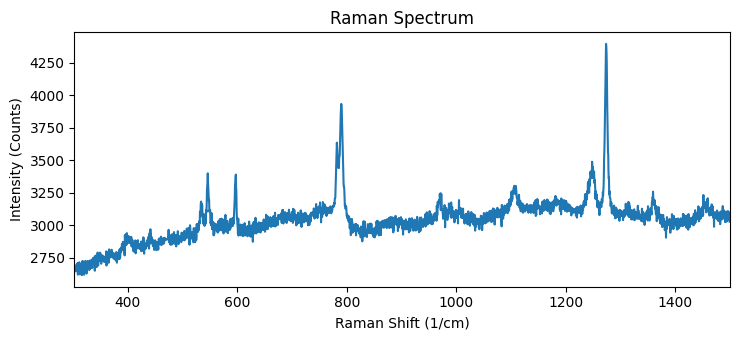

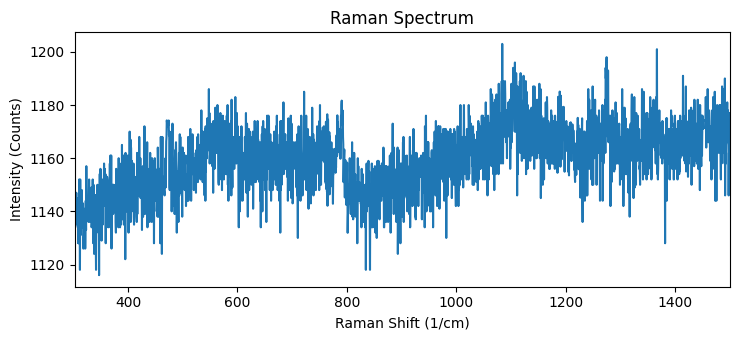

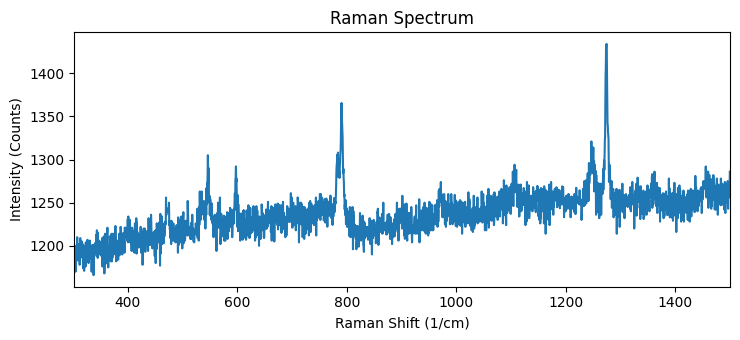

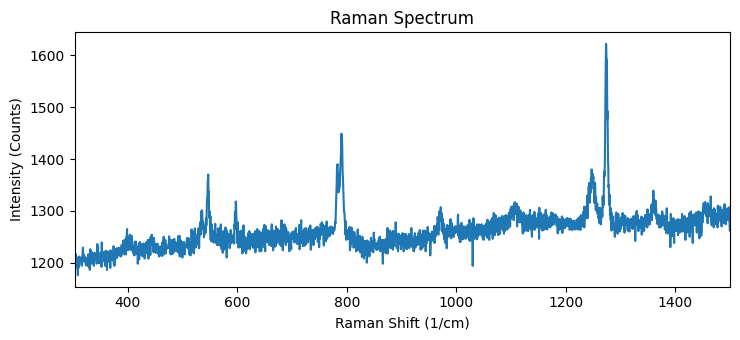

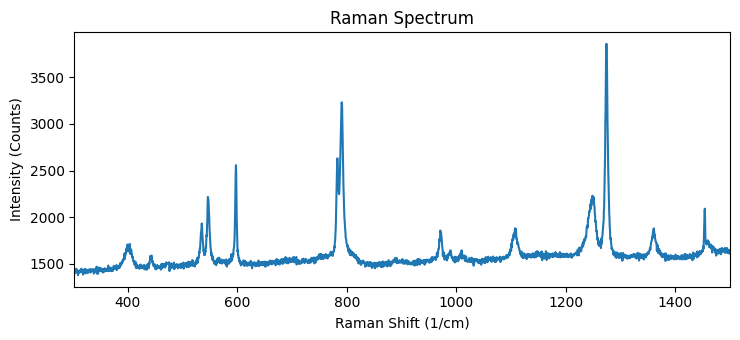

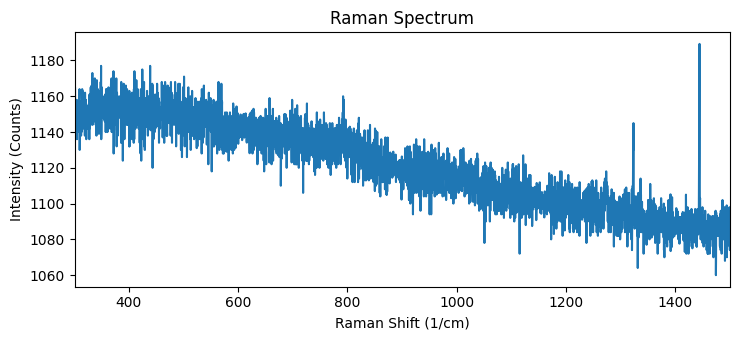

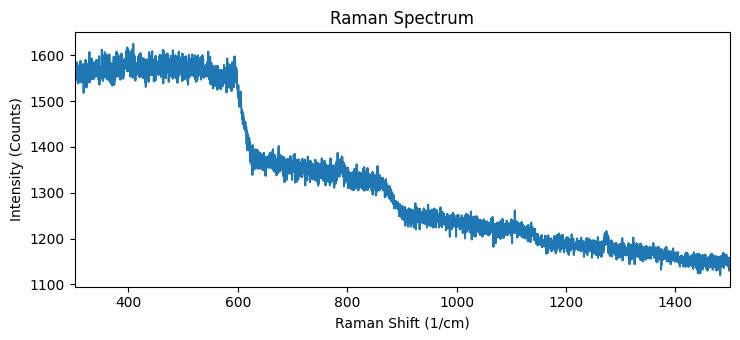

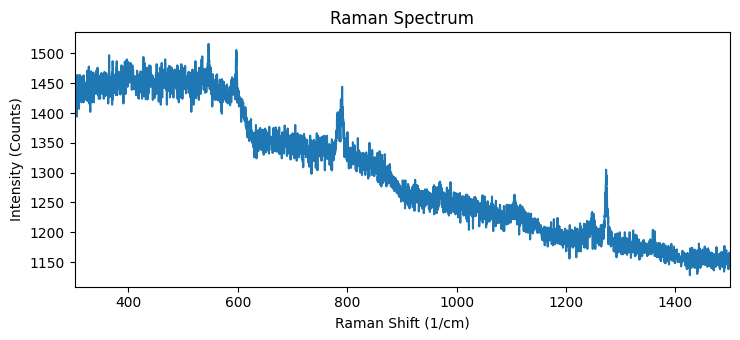

In [46]:
from google.colab import output
output.enable_custom_widget_manager()
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import lfilter
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, \
     AnnotationBbox

def graph(inp, max):
  text1="Raman Spectrum"
  data=pd.read_csv(inp)
  x=data.iloc[:,0]
  y=data.iloc[:,1]


  plt.plot(x, y)
  plt.title(text1)
  plt.xlabel("Raman Shift (1/cm)")
  plt.ylabel("Intensity (Counts)")
  plt.xlim([data.iloc[0,0], 1500])
  plt.show() 

graph("https://raw.githubusercontent.com/TP247/RamanData/main/CytosinePowder.csv", 1500)
graph("https://raw.githubusercontent.com/TP247/RamanData/main/CytosineSolution10x.csv", 50)
graph("https://raw.githubusercontent.com/TP247/RamanData/main/CytosineSolution10x%20(2).csv", 175)
graph("https://raw.githubusercontent.com/TP247/RamanData/main/CytosineSolution20x.csv", 250)
graph("https://raw.githubusercontent.com/TP247/RamanData/main/CytosineSolution50x.csv", 1750)
graph("https://raw.githubusercontent.com/TP247/RamanData/main/CytosineSolution10x_633.csv",1750)
graph("https://raw.githubusercontent.com/TP247/RamanData/main/CytosineSolution20x_633.csv", 50)
graph("https://raw.githubusercontent.com/TP247/RamanData/main/CytosineSolution50x_633.csv", 80)


Code for Baseline Correction

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
from ipywidgets import interact, interactive
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
#import matplotlib._png import read_png
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import lfilter
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, \
     AnnotationBbox

def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z
def graph(n,n1):
  text1="Raman Spectrum"
  data=pd.read_table("CytosinePowder.txt")
  x=data.iloc[:,0]
  y=data.iloc[:,1]
  baseline_correct=baseline_als(y,n,n1)
  corrected_raman=y-baseline_correct
  #fig, ax = plt.subplots()
  #imageFile = "Cytosine.png"
  #img=mpimg.imread(imageFile)
  #imgplot = ax.imshow(img)
  #tx, ty = [data.iloc[0,0]-80,800]
  #transform = mpl.transforms.Affine2D().translate(tx, ty)
  #imgplot.set_transform(transform + ax.transData)

  plt.plot(x,y,label='Without Baseline Correction')
  plt.plot(x,baseline_correct,label='Polynomial for Baseline Correct')
  plt.plot(x,corrected_raman,label='With Baseline Correction')
  plt.title(text1)
  plt.xlabel("Raman Shift (1/cm)")
  plt.ylabel("Intensity (Counts)")
  plt.xlim([data.iloc[0,0], 1500])
  plt.legend()
  plt.show() 
  
interact(graph,n=(0,99999),n1=(0.01,0.1,0.01));
#graph("Original Cytosine/CytosineSolution10x.txt", 50)
#graph("Original Cytosine/CytosineSolution10x (2).txt", 175)
#graph("Original Cytosine/CytosineSolution20x.txt", 250)
#graph("Original Cytosine/CytosineSolution50x.txt", 1750)
#graph("Original Cytosine/CytosineSolution20x_633.txt", 50)
#graph("Original Cytosine/CytosineSolution50x_633.txt", 80)




interactive(children=(IntSlider(value=49999, description='n', max=99999), FloatSlider(value=0.05, description=…

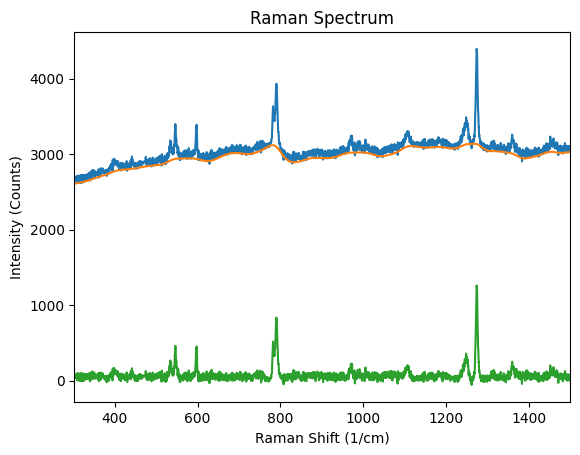

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
from ipywidgets import interact, interactive
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib as mpl

def baseline_als(y, lam, p, niter=10):
  L = len(y)
  #diff-takes difference of consecutive elements of an array, eye is an identity matrix, the function is carried out twice.
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  #makes an array of ones
  w = np.ones(L)
  for i in range(niter):
    #converts array into a matrix (k=0 for main diagnol?)
    W = sparse.spdiags(w, 0, L, L)
    #modifies and adds on  to previous matrix
    Z = W + lam * D.dot(D.transpose())
    #z is the matrix Z is multiplied to get w*y
    z = spsolve(Z, w*y)
    #w is now set to multiply the input p with values of y which are greater than z and with 1-p for values of y lesser than z
    w = p * (y > z) + (1-p) * (y < z)
  return z

def graph(n,n1):
  data=pd.read_table("CytosinePowder.txt")
  x=data.iloc[:,0]
  y=data.iloc[:,1]
  baseline_correct=baseline_als(y,n,n1)
  #Ideal: 10000,0.005
  corrected_raman=y-baseline_correct

  plt.plot(x,y)
  plt.plot(x,baseline_correct)
  plt.plot(x,corrected_raman)
  plt.title("Raman Spectrum")
  plt.xlabel("Raman Shift (1/cm)")
  plt.ylabel("Intensity (Counts)")
  plt.xlim([data.iloc[0,0], 1500])
  plt.show() 

#interact(graph,n=(0,99999),n1=(0.01,0.1,0.01));
graph(10000,0.005)


Code for Saving Data

In [ ]:
def saveData(inp1):
  data=pd.read_table(inp1)
  x1=data.iloc[:,0]
  y2=data.iloc[:,1]
  baseline_correct1=baseline_als(y2,10000,0.001)
  corrected_raman1=y2-baseline_correct1
  df = pd.DataFrame(data) 
  raman=x1
  intensity=corrected_raman1
  list_=list(zip(raman,intensity))
  df1 = pd.DataFrame(list_,columns = ['Raman Shift (1/cm)','Intensity (Counts)'])
  df1.to_csv('CytosineSolution50x_633BC.csv', index=False)
saveData("CytosineSolution50x_633.txt")

Code for Noise Reduction

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
from ipywidgets import interact, interactive
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import lfilter
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, \
     AnnotationBbox

def graph(n):
  text1="Raman Spectrum"
  data=pd.read_table("CytosinePowder.txt")
  x=data.iloc[:,0]
  y=data.iloc[:,1]
      # the larger n is, the smoother curve will be
  b = [1 / n] * n
  a = 1
  yy = lfilter(b, a, y) 
  def img():
    fig, ax = plt.subplots()
    imageFile = "Cytosine.png"
    logo=imageFile
    imagebox = OffsetImage(logo, zoom = 0.15)
    ab = AnnotationBbox(imagebox, (5, 700), frameon = False)
    ax.add_artist(ab)

  plt.plot(x,y,label="Without Noise Reduction")
  plt.plot(x, yy,label="With Noise Reduction")
  plt.title(text1)
  plt.xlabel("Raman Shift (1/cm)")
  plt.ylabel("Intensity (Counts)")
  plt.xlim([400, 1500])
  plt.legend()
  plt.show() 

interact(graph,n=(1,100,1));
#graph(10,"CytosineSolution10x.txt", 50)
#graph(10,"CytosineSolution10x (2).txt", 175)
#graph(10,"CytosineSolution20x.txt", 250)
#graph(10,"CytosineSolution50x.txt", 1750)
#graph(10,"CytosineSolution20x_633.txt", 50)
#graph(15,"CytosineSolution50x_633.txt", 80)
#graph(10,"DL_LEUCINE.txt",100)


interactive(children=(IntSlider(value=50, description='n', min=1), Output()), _dom_classes=('widget-interact',…

Code for Baseline Correction and Noise Reduction

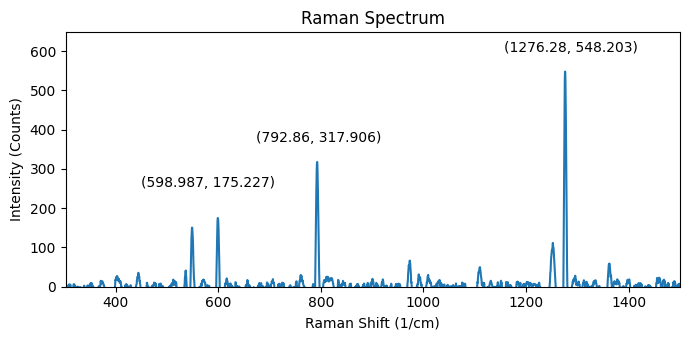

596
598.987
175.227


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import lfilter
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, \
     AnnotationBbox
from matplotlib.cbook import get_sample_data

def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
    return z
def graph(n, inp, max1):
  text1="Raman Spectrum"
  data=pd.read_table(inp)
  x=data.iloc[:,0]
  y=data.iloc[:,1]
      # the larger n is, the smoother curve will be
  b = [1 / n] * n
  a = 1
  yy = lfilter(b, a, y) 
  baseline_correct=baseline_als(y,10000,0.09)
  corrected_raman=yy-baseline_correct
   
  im = plt.imread('Cytosine.png')

  fig, ax = plt.subplots()

  data1=pd.read_table("CytosinePowderOA.txt")
  y1=data1.iloc[:,1]
  i = data1.index
  max_=max(y1)
  index = data1.iloc[:,1] == max_
  result = i[index]
  list1=result.tolist()
  maxind=list1[0]
  plt.text(x=data1.iloc[maxind,0]-120,y=data1.iloc[maxind,1]+50,s=(data1.iloc[maxind,0],max_))
  plt.text(x=data1.iloc[1001,0]-120,y=data1.iloc[1001,1]+50,s=(data1.iloc[1001,0],data1.iloc[1001,1]))
  plt.text(x=data1.iloc[596,0]-150,y=data1.iloc[596,1]+80,s=(data1.iloc[596,0],data1.iloc[596,1]))
  plt.plot(x, corrected_raman)
  plt.title(text1)
  plt.xlabel("Raman Shift (1/cm)")
  plt.ylabel("Intensity (Counts)")
  plt.xlim([data.iloc[0,0], 1500])
  plt.ylim([0,max(y1)+100])
  plt.show() 
def MaxInd(inpa,min,ma):
  #Reads text file.
  data=pd.read_table(inpa)
  #Uses the parameters and produces a result of y values which lie in the given range.
  y1=data.iloc[min:ma,1]
  #Assigns an index to each value in the table.
  i = data.index
  #Assigns a variable which defines data as equal to or not equal to (boolean) maximum y value in the given range.
  index = data.iloc[:,1] == max(y1)
  #Accesses the index of the maximum y value (where the index variable is true) (in the given range).
  result = i[index]
  #Converts the result variable into a list so it is accesible.
  list1=result.tolist()
  #Defines maxInd which is the first value in the list.
  maxind=list1[0]
  #Prints the index of the maximum y value.
  print(maxind)
  #Prints the corresponding raman shift of the maximum y value.
  print(data.iloc[maxind,0])
  #Prints the maximum y value.
  print(max(y1))

def IndFind(inpu,fi):
  data=pd.read_table(inpu)
  x1=data.iloc[fi,0]
  print(x1)
  y1=data.iloc[fi,1]
  print(y1)
def saveData(inp1,n):
  data=pd.read_table(inp1)
  x=data.iloc[:,0]
  y=data.iloc[:,1]
  b = [1 / n] * n
  a = 1
  yy = lfilter(b, a, y) 
  baseline_correct=baseline_als(y,10000,0.09)
  corrected_raman=yy-baseline_correct
  df = pd.DataFrame(data) 
  raman=x
  intensity=corrected_raman
  list_=list(zip(raman,intensity))
  df1 = pd.DataFrame(list_,columns = ['Raman Shift (1/cm)','Intensity (Counts)'])
  df1.to_csv('CytosineSolution50x_633OA.csv', index=False)

graph(10,"CytosinePowder.txt", 1500)
MaxInd('CytosinePowderOA.txt',500,900)
#IndFind('CytosinePowderOA.txt',1100)

Creating a Slider


(3, 1)
5.8125 2.6950000000000003


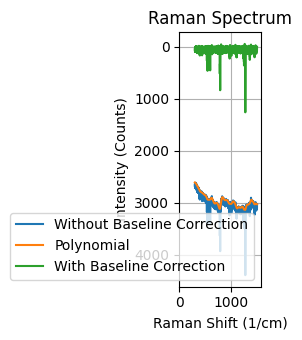

In [44]:
from google.colab import output
output.enable_custom_widget_manager()
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib as mpl
from PIL import Image
import requests
from matplotlib import pyplot as plt
from io import BytesIO

def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z
def bro():
  url=("https://raw.githubusercontent.com/TP247/RamanData/main/CytosinePowder.csv")
  url2=("https://raw.githubusercontent.com/TP247/RamanData/main/Cytosine.png")
  response = requests.get(url2)
  img = Image.open(BytesIO(response.content))
  img2 = img.resize((3, 1), Image.ANTIALIAS)
  i_s=img2.size
  print(i_s)
  data=pd.read_csv(url)
  x=data.iloc[:,0]
  y=data.iloc[:,1]
  baseline_correction=baseline_als(y,10000,0.005)
  corrected_raman=y-baseline_correction 
  fig, ax = plt.subplots()
  tx,ty=[1000,5000]
  bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
  print(bbox.width, bbox.height)
  plt.imshow(img2)
  ax.plot(x,y,label='Without Baseline Correction')
  ax.plot(x,baseline_correction,label="Polynomial")
  ax.plot(x,corrected_raman,label="With Baseline Correction")
  ax.set(xlabel='Raman Shift (1/cm)',ylabel='Intensity (Counts)',title='Raman Spectrum')
  ax.grid()
  ax.legend()
bro()


